# Olist_EDA

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sellers=pd.read_csv("C:/Users/6aimh/OneDrive/바탕 화면/마케팅/olist/olist_sellers_dataset.csv")
customers=pd.read_csv("C:/Users/6aimh/OneDrive/바탕 화면/마케팅/olist/olist_customers_dataset.csv")
geolocation=pd.read_csv("C:/Users/6aimh/OneDrive/바탕 화면/마케팅/olist/olist_geolocation_dataset.csv")
payments=pd.read_csv("C:/Users/6aimh/OneDrive/바탕 화면/마케팅/olist/olist_order_payments_dataset.csv")
reviews=pd.read_csv("C:/Users/6aimh/OneDrive/바탕 화면/마케팅/olist/olist_order_reviews_dataset.csv")
orders=pd.read_csv("C:/Users/6aimh/OneDrive/바탕 화면/마케팅/olist/olist_orders_dataset.csv")
items=pd.read_csv("C:/Users/6aimh/OneDrive/바탕 화면/마케팅/olist/olist_order_items_dataset.csv")
products=pd.read_csv("C:/Users/6aimh/OneDrive/바탕 화면/마케팅/olist/olist_products_dataset.csv")
translation=pd.read_csv("C:/Users/6aimh/OneDrive/바탕 화면/마케팅/olist/product_category_name_translation.csv")

## 1. 전체 데이터

In [4]:
whole=pd.read_csv("C:/Users/6aimh/OneDrive/바탕 화면/마케팅/.venv/입지선정 전처리/전처리1차_입지선정.csv")

In [5]:
whole_items=pd.merge(whole,items,how='left',on='order_id')
whole.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'geolocation_lat', 'geolocation_lng',
       'time_difference_0', 'time_difference_1', 'time_difference_2',
       'time_difference_total'],
      dtype='object')

In [6]:
whole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97933 entries, 0 to 97932
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       97933 non-null  object 
 1   customer_id                    97933 non-null  object 
 2   order_status                   97933 non-null  object 
 3   order_purchase_timestamp       97933 non-null  object 
 4   order_approved_at              97915 non-null  object 
 5   order_delivered_carrier_date   97312 non-null  object 
 6   order_delivered_customer_date  96206 non-null  object 
 7   order_estimated_delivery_date  97933 non-null  object 
 8   customer_unique_id             97933 non-null  object 
 9   customer_zip_code_prefix       97933 non-null  int64  
 10  customer_city                  97933 non-null  object 
 11  customer_state                 97933 non-null  object 
 12  geolocation_lat                97933 non-null 

### 1-1. state별 매출

In [8]:
whole_items=pd.merge(whole,items,how='left',on='order_id')
whole_items.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'geolocation_lat', 'geolocation_lng',
       'time_difference_0', 'time_difference_1', 'time_difference_2',
       'time_difference_total', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

매출 상위 10위권의 데이터

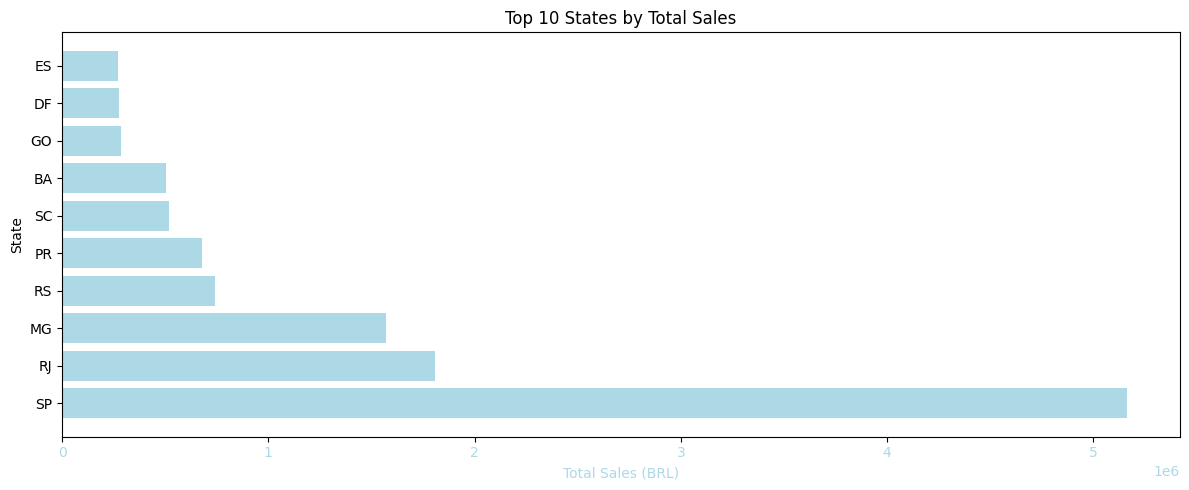

In [9]:
# Group by 'customer_state' and calculate the total sales
state_sales = whole_items.groupby('customer_state')['price'].sum().reset_index()
state_sales_sorted = state_sales.sort_values(by='price', ascending=False).head(10)  # Get top 10 states

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 5))

# Horizontal bar chart for top 10 total sales
bars = ax1.barh(state_sales_sorted['customer_state'], state_sales_sorted['price'], color='lightblue', label='Total Sales (BRL)')
ax1.set_xlabel('Total Sales (BRL)', color='lightblue')
ax1.set_ylabel('State')
ax1.tick_params(axis='x', labelcolor='lightblue')

# Add titles and layout adjustments
plt.title('Top 10 States by Total Sales')
fig.tight_layout()

# Show the plot
plt.show()


### 1-2. SP state를 제외한 나머지 주들의 전체 매출에 대한 각 state의 총매출의 비율

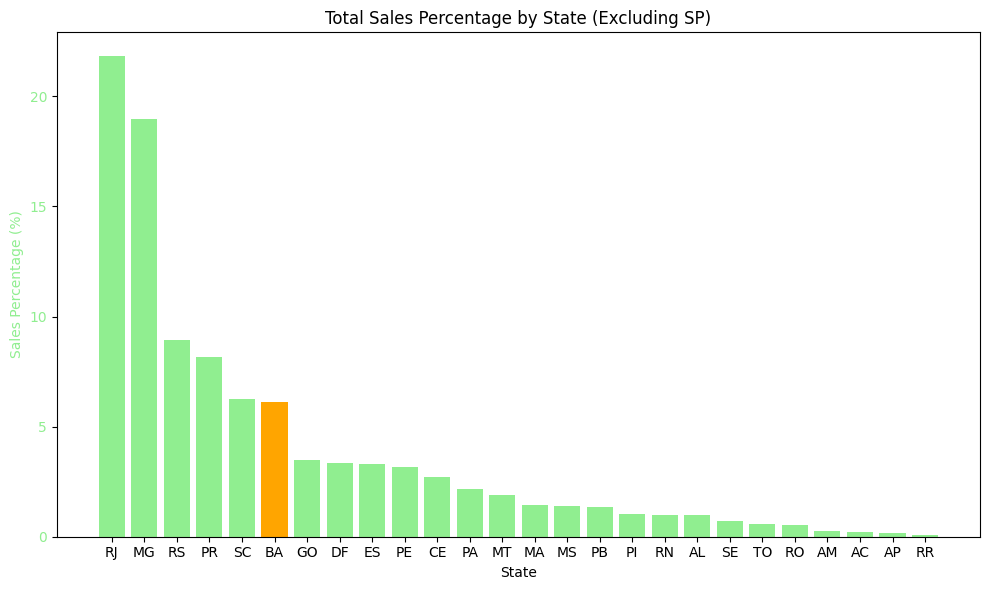

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter out the SP state
filtered_whole = whole_items[whole_items['customer_state'] != 'SP']

# Group by 'customer_state' and calculate the total sales
state_sales = filtered_whole.groupby('customer_state')['price'].sum().reset_index()

# Calculate the total sales excluding SP
total_sales_excluding_sp = state_sales['price'].sum()

# Calculate the percentage of each state's sales relative to the total sales
state_sales['percentage'] = (state_sales['price'] / total_sales_excluding_sp) * 100

# Sort by sales for better visualization
state_sales_sorted = state_sales.sort_values(by='percentage', ascending=False)

# Define colors for specific states
highlight_states = ['SP', 'BA']
colors = ['orange' if state in highlight_states else 'lightgreen' for state in state_sales_sorted['customer_state']]

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for sales percentage
bars = ax1.bar(state_sales_sorted['customer_state'], state_sales_sorted['percentage'], color=colors)
ax1.set_xlabel('State')
ax1.set_ylabel('Sales Percentage (%)', color='lightgreen')
ax1.tick_params(axis='y', labelcolor='lightgreen')

# Add titles and layout adjustments
plt.title('Total Sales Percentage by State (Excluding SP)')
fig.tight_layout()

# Show the plot
plt.show()


### 1-3. state별 총 주문량

상위 10위권

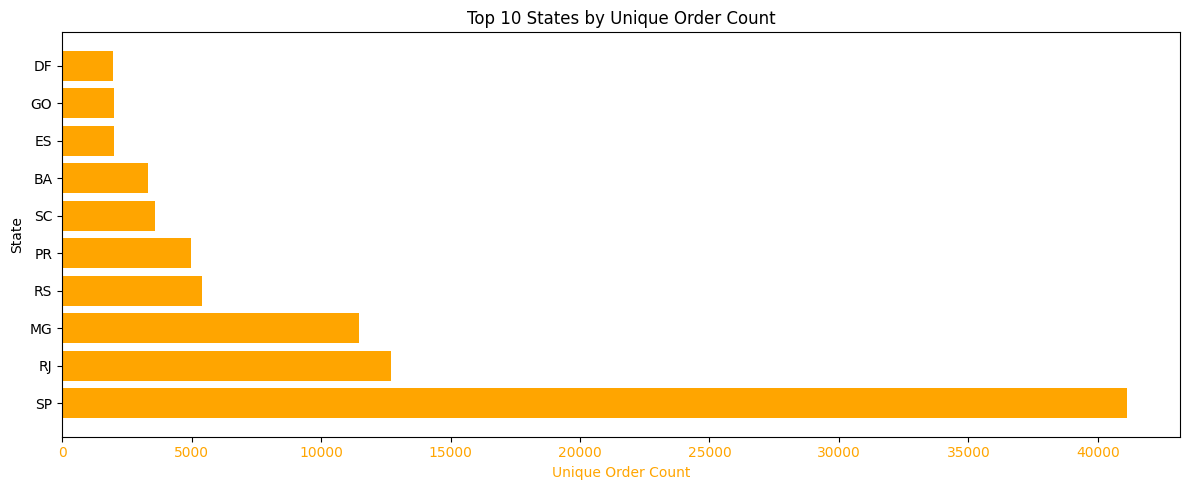

In [13]:
import matplotlib.pyplot as plt

# Group by 'customer_state' and count the unique 'order_id' for each state
state_unique_order_count = whole_items.groupby('customer_state')['order_id'].nunique().reset_index()
state_unique_order_count_sorted = state_unique_order_count.sort_values(by='order_id', ascending=False).head(10)  # Get top 10 states

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 5))

# Horizontal bar chart for top 10 unique order count
bars = ax1.barh(state_unique_order_count_sorted['customer_state'], state_unique_order_count_sorted['order_id'], color='orange', label='Unique Order Count')
ax1.set_xlabel('Unique Order Count', color='orange')
ax1.set_ylabel('State')
ax1.tick_params(axis='x', labelcolor='orange')

# Add titles and layout adjustments
plt.title('Top 10 States by Unique Order Count')
fig.tight_layout()

# Show the plot
plt.show()


### 1-4. state별 평균 배송비

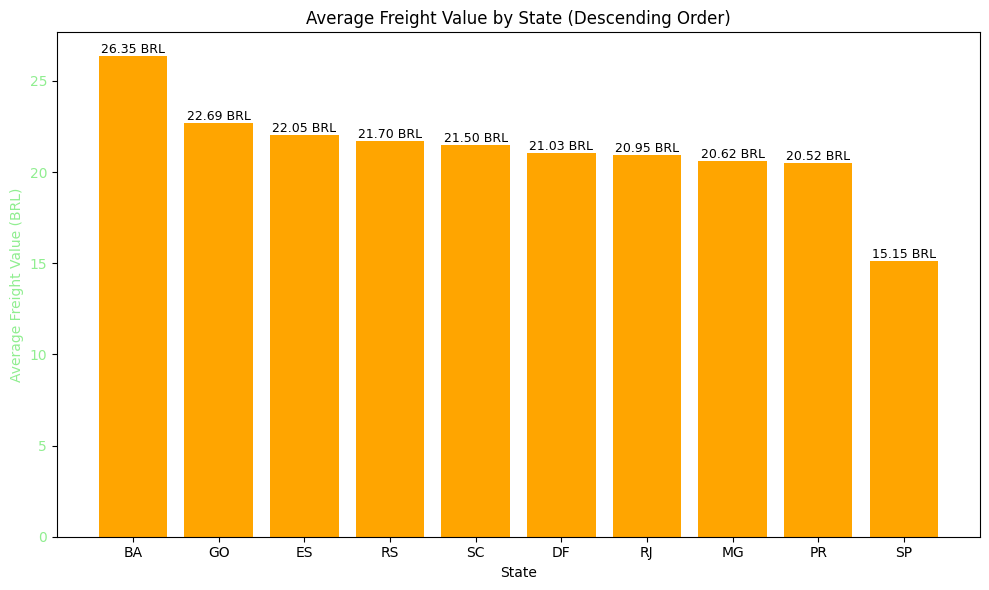

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the states of interest
target_states = ['SP', 'RJ', 'MG', 'RS', 'PR', 'SC', 'BA', 'GO', 'DF', 'ES']

# Group by 'customer_state' and calculate the average of 'freight_value'
state_freight = whole_items.groupby('customer_state')['freight_value'].mean().reset_index()

# Filter the DataFrame for the target states
state_freight_filtered = state_freight[state_freight['customer_state'].isin(target_states)]

# Sort values
state_freight_sorted = state_freight_filtered.sort_values(by='freight_value', ascending=False)

# Define colors for specific states
highlight_states = target_states  # Use target states for highlighting
colors = ['orange' if state in highlight_states else 'lightgreen' for state in state_freight_sorted['customer_state']]

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for average freight value
bars = ax1.bar(state_freight_sorted['customer_state'], state_freight_sorted['freight_value'], color=colors)
ax1.set_xlabel('State')
ax1.set_ylabel('Average Freight Value (BRL)', color='lightgreen')
ax1.tick_params(axis='y', labelcolor='lightgreen')

# Annotate average freight value on the bar chart
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.2f} BRL', ha='center', va='bottom', fontsize=9)

# Add titles and layout adjustments
plt.title('Average Freight Value by State (Descending Order)')
fig.tight_layout()

# Show the plot
plt.show()


### 1-5. state별 평균 배송시간

전체 주 버전

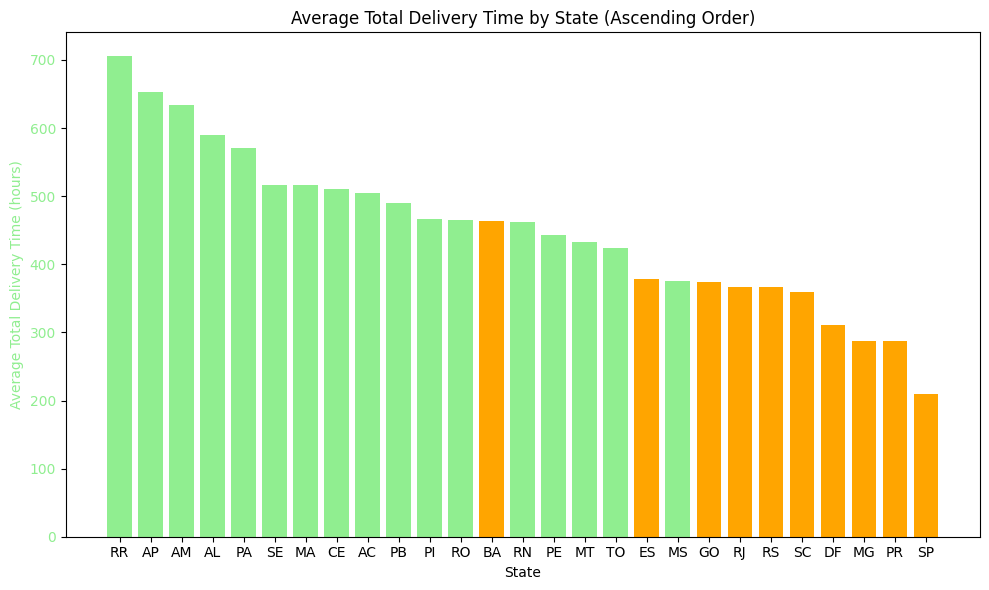

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'time_difference_total' from string to timedelta
whole['time_difference_total'] = pd.to_timedelta(whole['time_difference_total'])

# Group by 'customer_state' and calculate the average of 'time_difference_total'
state_time_diff = whole.groupby('customer_state')['time_difference_total'].mean().reset_index()
state_time_diff_sorted = state_time_diff.sort_values(by='time_difference_total', ascending=False)

# Convert average delivery time to total hours for easier reading
state_time_diff_sorted['time_difference_total_hours'] = state_time_diff_sorted['time_difference_total'].dt.total_seconds() / 3600

# Define colors for specific states
highlight_states = ['SP', 'RJ', 'MG', 'RS', 'PR', 'SC', 'BA', 'GO', 'DF', 'ES']
colors = ['orange' if state in highlight_states else 'lightgreen' for state in state_time_diff_sorted['customer_state']]

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for average total delivery time
bars = ax1.bar(state_time_diff_sorted['customer_state'], state_time_diff_sorted['time_difference_total_hours'], color=colors, label='Average Total Delivery Time')
ax1.set_xlabel('State')
ax1.set_ylabel('Average Total Delivery Time (hours)', color='lightgreen')
ax1.tick_params(axis='y', labelcolor='lightgreen')

# Add titles and layout adjustments
plt.title('Average Total Delivery Time by State (Ascending Order)')
fig.tight_layout()

# Show the plot
plt.show()


주문량 top10의 평균 배송시간

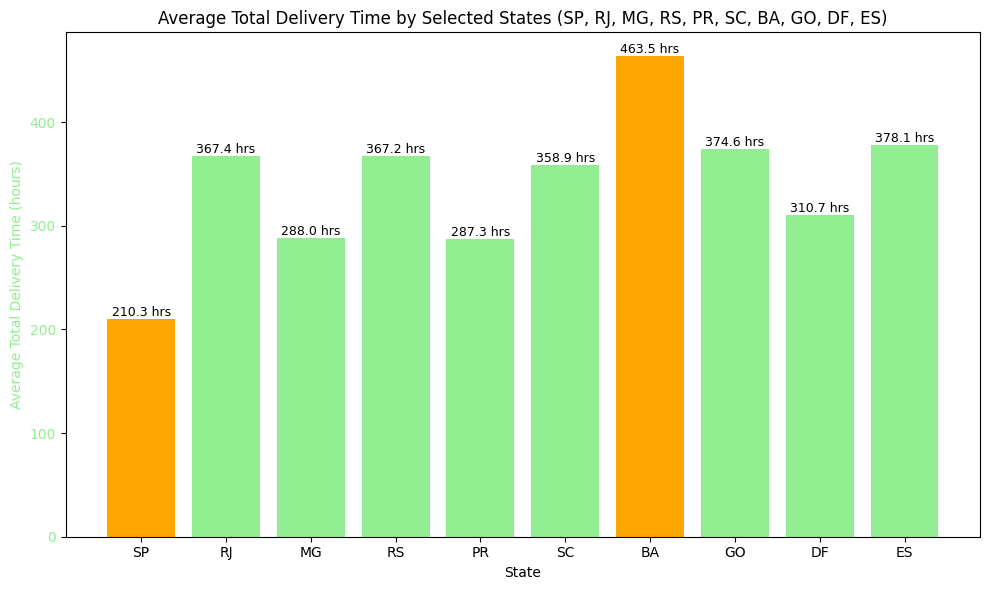

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'time_difference_total' from string to timedelta
whole['time_difference_total'] = pd.to_timedelta(whole['time_difference_total'])

# Define the states of interest
target_states = ['SP', 'RJ', 'MG', 'RS', 'PR', 'SC', 'BA', 'GO', 'DF', 'ES']

# Filter the DataFrame for the target states
filtered_whole = whole[whole['customer_state'].isin(target_states)]

# Group by 'customer_state' and calculate the average of 'time_difference_total'
state_time_diff = filtered_whole.groupby('customer_state')['time_difference_total'].mean().reset_index()
state_time_diff_sorted = state_time_diff.sort_values(by='customer_state', key=lambda x: x.map({state: idx for idx, state in enumerate(target_states)}))

# Convert average delivery time to total hours for easier reading
state_time_diff_sorted['time_difference_total_hours'] = state_time_diff_sorted['time_difference_total'].dt.total_seconds() / 3600

# Define colors for specific states
highlight_states = ['SP','BA']
colors = ['orange' if state in highlight_states else 'lightgreen' for state in state_time_diff_sorted['customer_state']]

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for average total delivery time
bars = ax1.bar(state_time_diff_sorted['customer_state'], state_time_diff_sorted['time_difference_total_hours'], color=colors, label='Average Total Delivery Time')
ax1.set_xlabel('State')
ax1.set_ylabel('Average Total Delivery Time (hours)', color='lightgreen')
ax1.tick_params(axis='y', labelcolor='lightgreen')

# Annotate average delivery time on the bar chart
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.1f} hrs', ha='center', va='bottom', fontsize=9)

# Add titles and layout adjustments
plt.title('Average Total Delivery Time by Selected States (SP, RJ, MG, RS, PR, SC, BA, GO, DF, ES)')
fig.tight_layout()

# Show the plot
plt.show()


## 2. SP

In [18]:
state_sp=pd.read_csv("C:/Users/6aimh/OneDrive/바탕 화면/마케팅/.venv/입지선정 전처리/전처리1차_입지선정_SP.csv")
state_sp.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,time_difference_0,time_difference_1,time_difference_2,time_difference_total
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.576983,-46.587161,0 days 00:10:42,2 days 08:47:45,6 days 01:30:13,8 days 10:28:40
1,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.676370,-46.514627,0 days 01:01:50,0 days 21:26:05,1 days 22:30:28,2 days 20:58:23
2,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,SP,-23.474030,-47.467397,0 days 00:10:30,12 days 07:39:52,5 days 21:29:06,18 days 05:19:28
3,34513ce0c4fab462a55830c0989c7edb,7711cf624183d843aafe81855097bc37,delivered,2017-07-13 19:58:11,2017-07-13 20:10:08,2017-07-14 18:43:29,2017-07-19 14:04:48,2017-08-08,782987b81c92239d922aa49d6bd4200b,4278,sao paulo,SP,-23.601856,-46.608910,0 days 00:11:57,0 days 22:33:21,4 days 19:21:19,5 days 18:06:37
4,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08,e2dfa3127fedbbca9707b36304996dab,4812,sao paulo,SP,-23.713190,-46.687407,0 days 00:11:04,0 days 19:20:46,4 days 02:36:25,4 days 22:08:15


In [20]:
state_sp.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'geolocation_lat', 'geolocation_lng',
       'time_difference_0', 'time_difference_1', 'time_difference_2',
       'time_difference_total'],
      dtype='object')

In [21]:
state_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41112 entries, 0 to 41111
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       41112 non-null  object 
 1   customer_id                    41112 non-null  object 
 2   order_status                   41112 non-null  object 
 3   order_purchase_timestamp       41112 non-null  object 
 4   order_approved_at              41106 non-null  object 
 5   order_delivered_carrier_date   40813 non-null  object 
 6   order_delivered_customer_date  40480 non-null  object 
 7   order_estimated_delivery_date  41112 non-null  object 
 8   customer_unique_id             41112 non-null  object 
 9   customer_zip_code_prefix       41112 non-null  int64  
 10  customer_city                  41112 non-null  object 
 11  customer_state                 41112 non-null  object 
 12  geolocation_lat                41112 non-null 

### 2-1. SP의 월별 매출

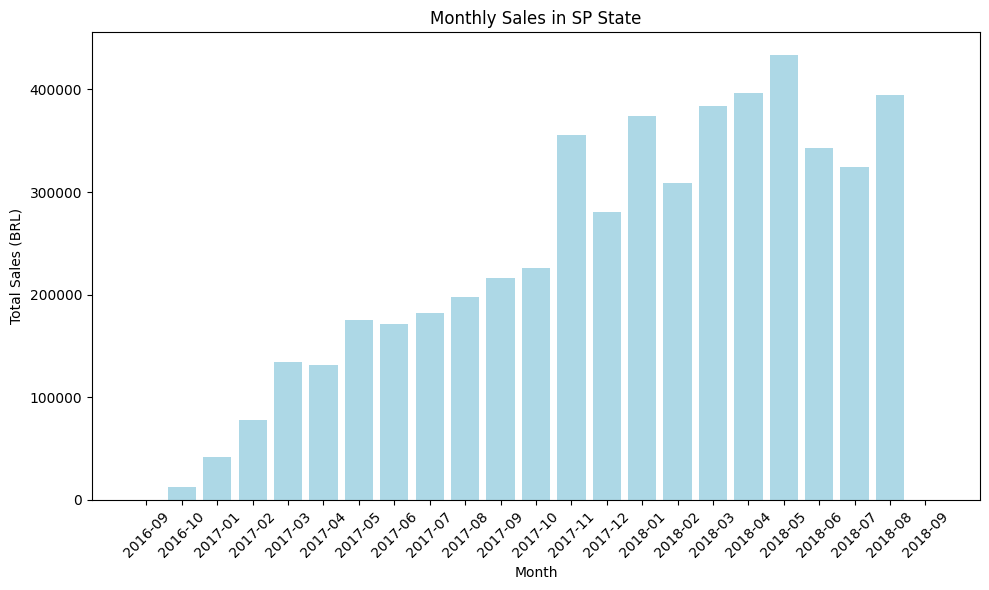

In [23]:
# Merge state_ba with items on 'order_id'
merged_data = state_sp.merge(items, on='order_id', how='left')

# Convert 'order_purchase_timestamp' to datetime
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

# Extract year and month for grouping
merged_data['year_month'] = merged_data['order_purchase_timestamp'].dt.to_period('M')

# Group by 'year_month' and calculate total sales
monthly_sales = merged_data.groupby('year_month')['price'].sum().reset_index()

# Convert 'year_month' back to string for better plotting
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

# Plotting the monthly sales
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['year_month'], monthly_sales['price'], color='lightblue')
plt.xlabel('Month')
plt.ylabel('Total Sales (BRL)')
plt.title('Monthly Sales in SP State')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


### 2-2. SP의 월별 주문량

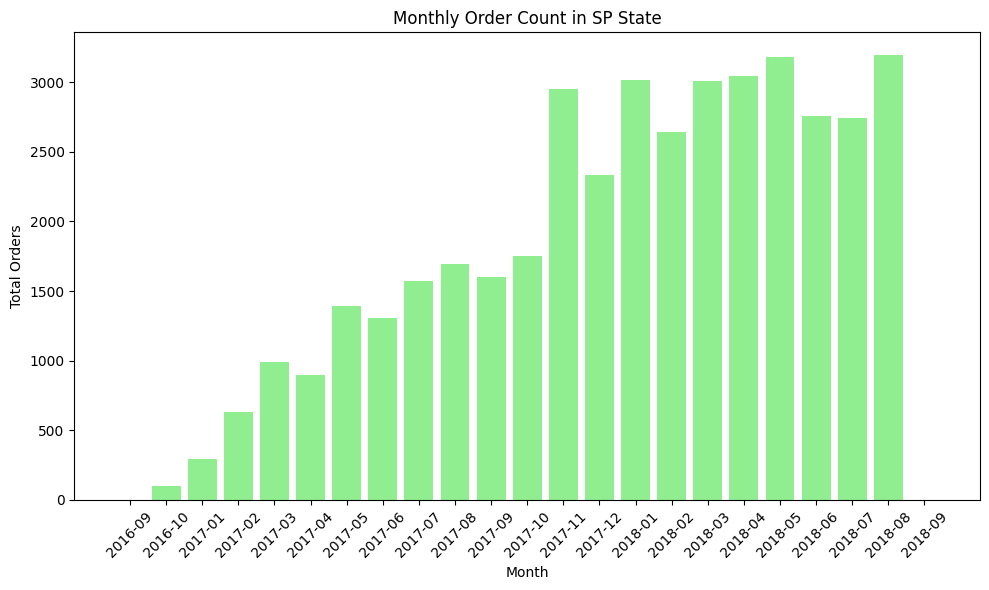

In [25]:
# Convert 'order_purchase_timestamp' to datetime
state_sp['order_purchase_timestamp'] = pd.to_datetime(state_sp['order_purchase_timestamp'])

# Extract year and month for grouping
state_sp['year_month'] = state_sp['order_purchase_timestamp'].dt.to_period('M')

# Group by 'year_month' and count the number of orders
monthly_order_count = state_sp.groupby('year_month')['order_id'].count().reset_index()

# Convert 'year_month' back to string for better plotting
monthly_order_count['year_month'] = monthly_order_count['year_month'].astype(str)

# Plotting the monthly order count
plt.figure(figsize=(10, 6))
plt.bar(monthly_order_count['year_month'], monthly_order_count['order_id'], color='lightgreen')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title('Monthly Order Count in SP State')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### 2-3. SP가 매달 전체 매출의 몇 %를 차지하는지

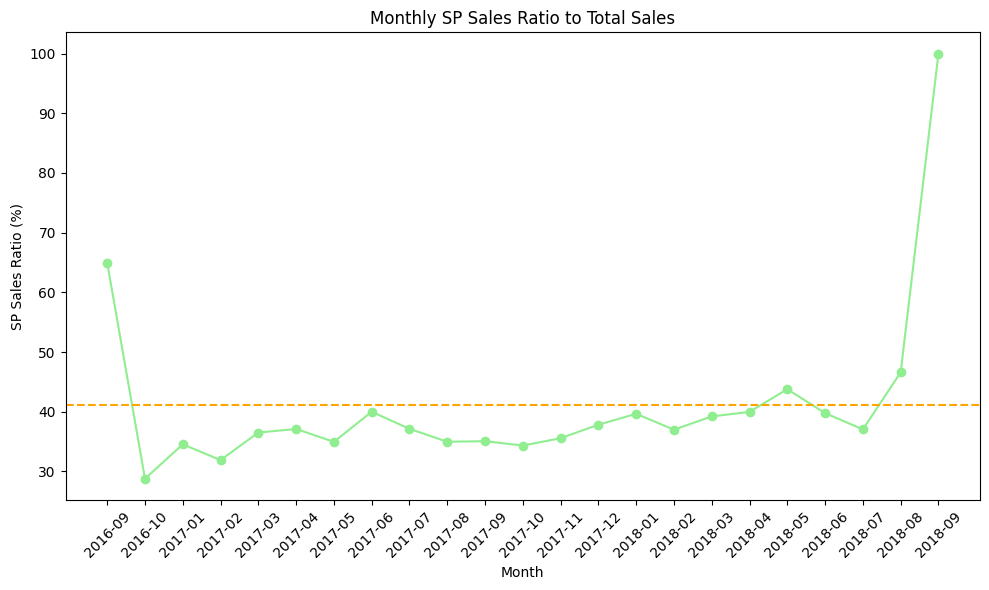

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'order_purchase_timestamp' to datetime in whole dataset
whole_items['order_purchase_timestamp'] = pd.to_datetime(whole_items['order_purchase_timestamp'])

# Extract year and month for grouping in whole dataset
whole_items['year_month'] = whole_items['order_purchase_timestamp'].dt.to_period('M')

# Group by 'year_month' and sum the 'price' for total sales
monthly_total_sales = whole_items.groupby('year_month')['price'].sum().reset_index()

# Group by 'year_month' for SP state sales
sp_sales = whole_items[whole_items['customer_state'] == 'SP'].groupby('year_month')['price'].sum().reset_index()

# Merge total sales and SP sales
monthly_sales = pd.merge(monthly_total_sales, sp_sales, on='year_month', suffixes=('_total', '_SP'))

# Calculate SP sales ratio
monthly_sales['sp_ratio'] = monthly_sales['price_SP'] / monthly_sales['price_total'] * 100

# 평균 비율 직선
average_sp_ratio = monthly_sales['sp_ratio'].mean()

# Convert 'year_month' back to string for better plotting
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

# Plotting the monthly SP sales ratio
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['year_month'], monthly_sales['sp_ratio'], marker='o', color='lightgreen')
plt.axhline(y=average_sp_ratio, color='orange', linestyle='--', label='Average SP Sales Ratio')
plt.xlabel('Month')
plt.ylabel('SP Sales Ratio (%)')
plt.title('Monthly SP Sales Ratio to Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


## 3. BA

In [29]:
state_ba=pd.read_csv("C:/Users/6aimh/OneDrive/바탕 화면/마케팅/.venv/입지선정 전처리/전처리1차_입지선정_BA.csv")
state_ba.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,time_difference_0,time_difference_1,time_difference_2,time_difference_total
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.177924,-44.660711,1 days 06:42:50,0 days 11:06:33,12 days 00:56:45,13 days 18:46:08
1,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-10-26 16:08:14,2017-10-26 21:46:53,2017-11-08 22:22:00,2017-11-23,634f09f6075fe9032e6c19609ffe995a,44024,feira de santana,BA,-12.244274,-38.979613,0 days 00:13:48,0 days 05:38:39,13 days 00:35:07,13 days 06:27:34
2,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18,576ea0cab426cd8a00fad9a9c90a4494,41213,salvador,BA,-12.939062,-38.438353,1 days 00:34:57,0 days 12:48:50,11 days 01:56:55,12 days 15:20:42
3,d22e9fa5731b9e30e8b27afcdc2f8563,756fb9391752dad934e0fe3733378e57,delivered,2018-08-04 23:25:30,2018-08-04 23:35:13,2018-08-06 15:03:00,2018-08-13 23:34:42,2018-09-13,394b2ce444baae9ae609f5d32000de0f,47850,luis eduardo magalhaes,BA,-12.092513,-45.806927,0 days 00:09:43,1 days 15:27:47,7 days 08:31:42,9 days 00:09:12
4,d17dc4a904426827ca80f2ccb3a6be56,569cf68214806a39acc0f39344aea67f,delivered,2017-05-14 20:28:25,2017-05-14 20:42:45,2017-05-16 08:17:46,2017-05-25 09:14:31,2017-06-12,c2551ea089b7ebbc67a2ea8757152514,44380,cruz das almas,BA,-12.670246,-39.103277,0 days 00:14:20,1 days 11:35:01,9 days 00:56:45,10 days 12:46:06


In [30]:
state_ba.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'geolocation_lat', 'geolocation_lng',
       'time_difference_0', 'time_difference_1', 'time_difference_2',
       'time_difference_total'],
      dtype='object')

In [31]:
state_ba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3336 entries, 0 to 3335
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       3336 non-null   object 
 1   customer_id                    3336 non-null   object 
 2   order_status                   3336 non-null   object 
 3   order_purchase_timestamp       3336 non-null   object 
 4   order_approved_at              3336 non-null   object 
 5   order_delivered_carrier_date   3316 non-null   object 
 6   order_delivered_customer_date  3248 non-null   object 
 7   order_estimated_delivery_date  3336 non-null   object 
 8   customer_unique_id             3336 non-null   object 
 9   customer_zip_code_prefix       3336 non-null   int64  
 10  customer_city                  3336 non-null   object 
 11  customer_state                 3336 non-null   object 
 12  geolocation_lat                3336 non-null   f

### 3-1. BA의 월별 매출

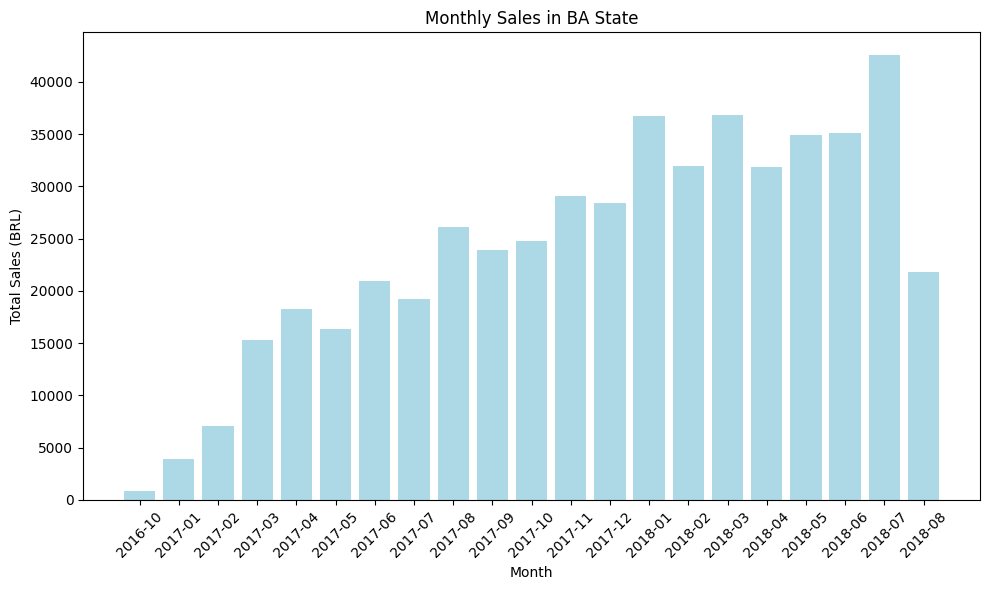

In [32]:
# Merge state_ba with items on 'order_id'
merged_data = state_ba.merge(items, on='order_id', how='left')

# Convert 'order_purchase_timestamp' to datetime
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

# Extract year and month for grouping
merged_data['year_month'] = merged_data['order_purchase_timestamp'].dt.to_period('M')

# Group by 'year_month' and calculate total sales
monthly_sales = merged_data.groupby('year_month')['price'].sum().reset_index()

# Convert 'year_month' back to string for better plotting
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

# Plotting the monthly sales
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['year_month'], monthly_sales['price'], color='lightblue')
plt.xlabel('Month')
plt.ylabel('Total Sales (BRL)')
plt.title('Monthly Sales in BA State')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


### 3-2. BA의 월별 주문량 

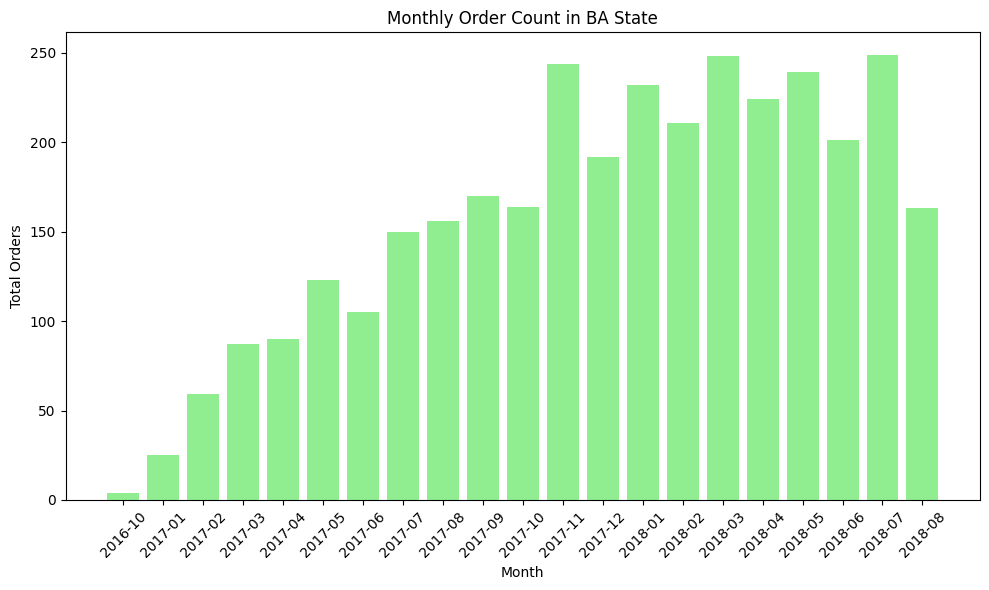

In [34]:
# Convert 'order_purchase_timestamp' to datetime
state_ba['order_purchase_timestamp'] = pd.to_datetime(state_ba['order_purchase_timestamp'])

# Extract year and month for grouping
state_ba['year_month'] = state_ba['order_purchase_timestamp'].dt.to_period('M')

# Group by 'year_month' and count the number of orders
monthly_order_count = state_ba.groupby('year_month')['order_id'].count().reset_index()

# Convert 'year_month' back to string for better plotting
monthly_order_count['year_month'] = monthly_order_count['year_month'].astype(str)

# Plotting the monthly order count
plt.figure(figsize=(10, 6))
plt.bar(monthly_order_count['year_month'], monthly_order_count['order_id'], color='lightgreen')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title('Monthly Order Count in BA State')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


### 3-3. 전체매출에 대한 BA 주의 매출의 비율이 월별로 어떻게 되는지

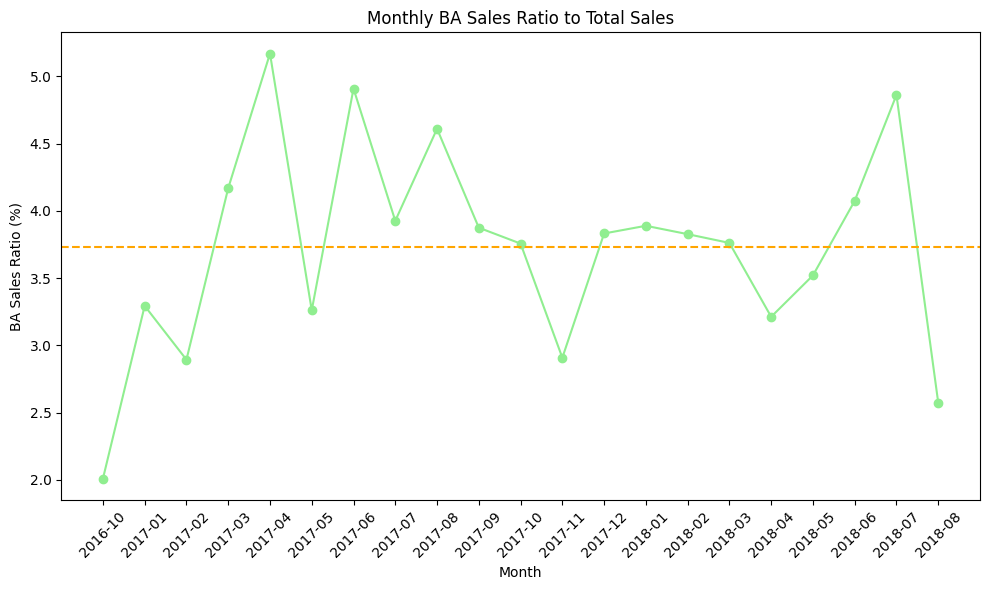

In [35]:
# Convert 'order_purchase_timestamp' to datetime in whole dataset
whole_items['order_purchase_timestamp'] = pd.to_datetime(whole_items['order_purchase_timestamp'])

# Extract year and month for grouping in whole dataset
whole_items['year_month'] = whole_items['order_purchase_timestamp'].dt.to_period('M')

# Group by 'year_month' and sum the 'price' for total sales
monthly_total_sales = whole_items.groupby('year_month')['price'].sum().reset_index()

# Group by 'year_month' for BA state sales
ba_sales = whole_items[whole_items['customer_state'] == 'BA'].groupby('year_month')['price'].sum().reset_index()

# Merge total sales and BA sales
monthly_sales = pd.merge(monthly_total_sales, ba_sales, on='year_month', suffixes=('_total', '_BA'))

# Calculate BA sales ratio
monthly_sales['ba_ratio'] = monthly_sales['price_BA'] / monthly_sales['price_total'] * 100

average_ba_ratio = monthly_sales['ba_ratio'].mean()

# Convert 'year_month' back to string for better plotting
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

# Plotting the monthly BA sales ratio
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['year_month'], monthly_sales['ba_ratio'], marker='o', color='lightgreen')
plt.axhline(y=average_ba_ratio, color='orange', linestyle='--', label='Average BA Sales Ratio')
plt.xlabel('Month')
plt.ylabel('BA Sales Ratio (%)')
plt.title('Monthly BA Sales Ratio to Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
